In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from config import database
import psycopg2

In [2]:
engine = create_engine(database)

In [9]:
query = "SELECT salary FROM salaries ORDER BY (salary);"
salary_info = pd.read_sql_query(query, database)
salary_info

,salary
0,40000
1,40000
2,40000
3,40000
4,40000
...,...
300019,125469
300020,126703
300021,127041
300022,127238


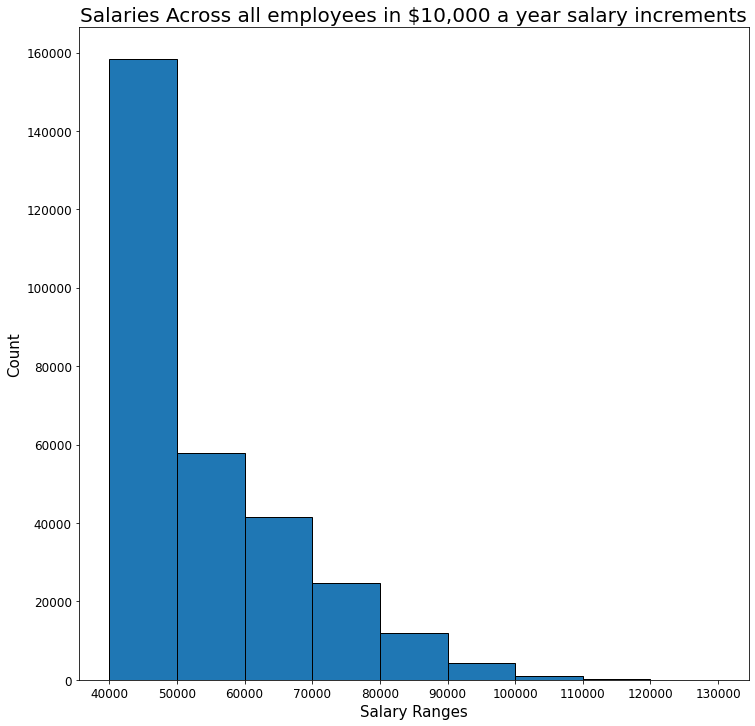

In [32]:
plt.figure(figsize=[12,12])
plt.hist(salary_info, bins=(range(40000, 140000, 10000)), ec='black')
plt.xlabel('Salary Ranges', size=15)
plt.xticks(ticks=range(40000, 140000, 10000), size=12)
plt.yticks(size=12)
plt.ylabel('Count', size=15)
plt.title('Salaries Across all employees in $10,000 a year salary increments', size=20)
plt.show()

In [17]:
query = "SELECT titles.staff, ROUND(AVG(salaries.salary),2) FROM titles JOIN employees ON employees.emp_title = titles.title_id JOIN salaries ON salaries.emp_no = employees.emp_no GROUP BY titles.staff;"
sal_by_title = pd.read_sql_query(query, database)
sal_by_title

,staff,round
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


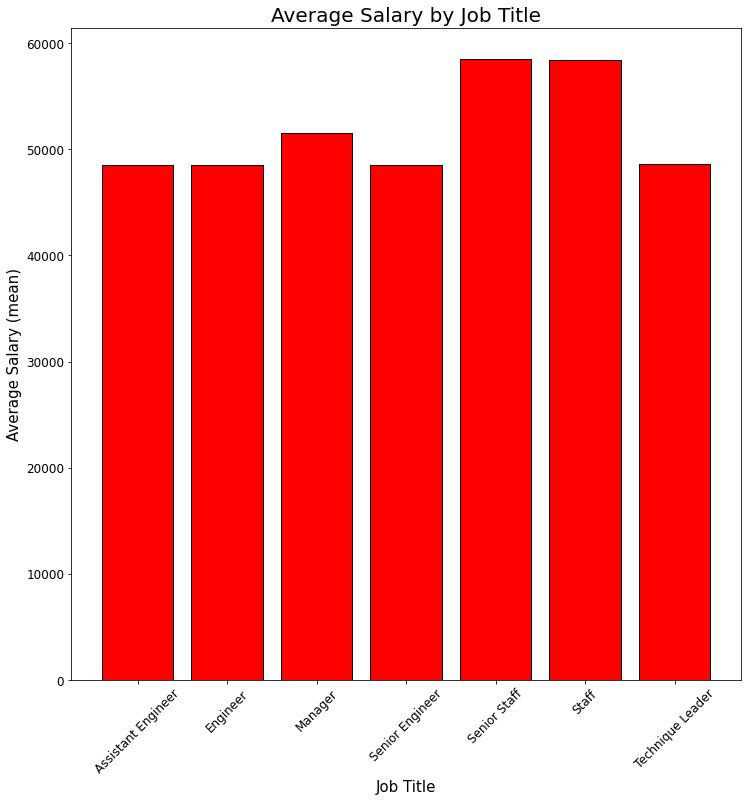

In [33]:
plt.figure(figsize=[12,12])
plt.bar(sal_by_title['staff'], sal_by_title['round'], color='r', ec='black')
plt.xlabel('Job Title', size=15)
plt.xticks(rotation=45, size=12)
plt.ylabel('Average Salary (mean)', size=15)
plt.yticks(size=12)
plt.title("Average Salary by Job Title", size=20)
plt.show()